In [ ]:
import pandas as pd
from os import X_OK

In [ ]:
df=pd.read_csv('/content/linear_data_20.csv')

In [ ]:
x=df['X'].values
y=df['Y'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30);

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
import torch
import torch.nn as nn
x_train_tensor=torch.tensor(x_train).float()
x_test_tensor=torch.tensor(x_test).float().view(-1,1)
y_train_tensor=torch.tensor(y_train).float()
y_test_tensor=torch.tensor(y_test).float().view(-1,1)

In [ ]:
class Neuralnet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(1,8)
    self.fc2=nn.Linear(8,10)
    self.fc3=nn.Linear(10,1)
    self.relu=nn.ReLU()
    self.history={'loss':[]}
  def forward(self,x):
    x=self.relu(self.fc1(x))
    x=self.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [ ]:
thrikesh_brain=Neuralnet()
criterion=nn.MSELoss()
optimizer=torch.optim.RMSprop(thrikesh_brain.parameters(),lr=0.001)

In [ ]:
def train_model(thrikesh_brain,x_train,y_train,criterion,optimizer,epochs=2000):
  for epoch in range(epochs):
    optimizer.zero_grad()
    loss=criterion(thrikesh_brain(x_train),y_train)
    loss.backward()
    optimizer.step()
    thrikesh_brain.history['loss'].append(loss.item())
    if epoch%200==0:
      print(f'epoch:[{epoch}/{epochs}], loss:{loss.item():.6f}')


In [ ]:
train_model(thrikesh_brain,x_train_tensor,y_train_tensor,criterion,optimizer)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([14])) that is different to the input size (torch.Size([14, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:[0/2000], loss:145.490784
epoch:[200/2000], loss:145.490799
epoch:[400/2000], loss:145.490784
epoch:[600/2000], loss:145.490768
epoch:[800/2000], loss:145.490799
epoch:[1000/2000], loss:145.490784
epoch:[1200/2000], loss:145.490768
epoch:[1400/2000], loss:145.490799
epoch:[1600/2000], loss:145.490799
epoch:[1800/2000], loss:145.490768


In [ ]:
with torch.no_grad():
    test_loss = criterion(thrikesh_brain(x_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 104.146339


In [ ]:
loss_df = pd.DataFrame(thrikesh_brain.history)

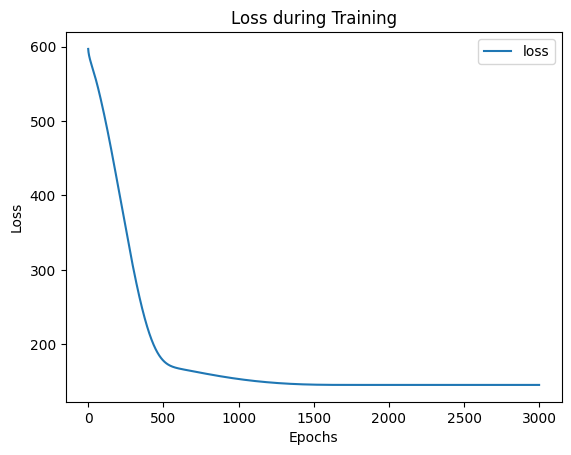

In [ ]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [ ]:
X_n1_1 = torch.tensor([[20]], dtype=torch.float32)
prediction = thrikesh_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 21.321014404296875


In [ ]:
print(df)

     X   Y
0    1   2
1    2   4
2    3   6
3    4   8
4    5  10
5    6  12
6    7  14
7    8  16
8    9  18
9   10  20
10  11  22
11  12  24
12  13  26
13  14  28
14  15  30
15  16  32
16  17  34
17  18  36
18  19  38
19  20  40
